In [ ]:
import pandas as pd
from matplotlib import  pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
df = pd.read_csv('Telco-Customer-Churn.csv')
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1503,0481-SUMCB,Female,1,No,No,45,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),102.15,4735.35,No
4562,5322-TEUJK,Female,0,Yes,Yes,71,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),114.60,8100.25,No
2175,7927-AUXBZ,Female,0,No,No,30,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,No,Electronic check,85.15,2555.9,Yes
4235,7629-WFGLW,Female,1,Yes,No,56,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,No,No,One year,No,Electronic check,95.65,5471.75,No
1930,2792-VPPET,Male,0,No,No,3,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,20.50,76.95,No


In [ ]:
df.drop('customerID', axis='columns', inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [ ]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [ ]:
pd.to_numeric(df.TotalCharges, errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [ ]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [ ]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()].shape

(11, 20)

In [ ]:
df.shape

(7043, 20)

In [ ]:
df.iloc[488]

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [ ]:
df.iloc[488]['TotalCharges']

' '

In [ ]:
df_updated = df[df.TotalCharges!=' ']
df_updated.shape

(7032, 20)

In [ ]:
df_updated.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
df_updated.TotalCharges = pd.to_numeric(df_updated.TotalCharges)

<ipython-input-15-103f12fae87c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_updated.TotalCharges = pd.to_numeric(df_updated.TotalCharges)


In [ ]:
df_updated.TotalCharges.dtypes

dtype('float64')

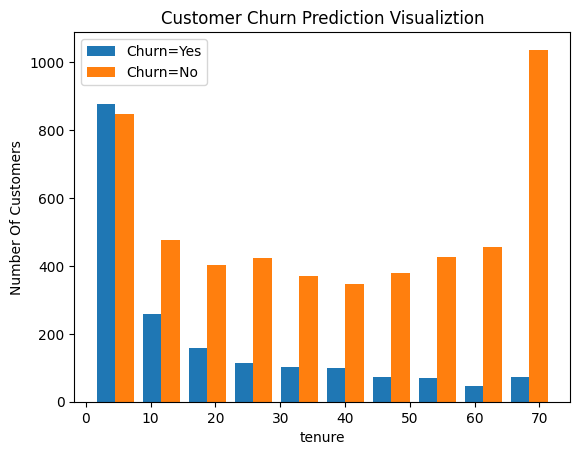

In [ ]:
tenure_churn_no = df_updated[df_updated.Churn=='No'].tenure
tenure_churn_yes = df_updated[df_updated.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes, tenure_churn_no],label=['Churn=Yes', 'Churn=No'])
plt.legend()

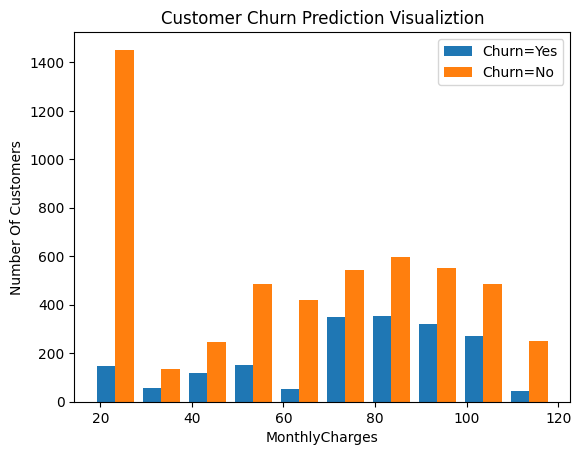

In [ ]:
mc_churn_no = df_updated[df_updated.Churn=='No'].MonthlyCharges
mc_churn_yes = df_updated[df_updated.Churn=='Yes'].MonthlyCharges

plt.xlabel("MonthlyCharges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([mc_churn_yes, mc_churn_no], label=['Churn=Yes', 'Churn=No'])
plt.legend()

In [ ]:
def print_unq_col_val(df):
  for column in df:
    if df[column].dtypes == 'object':
      print(f'{column} : {df[column].unique()}')

In [ ]:
print_unq_col_val(df_updated)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [ ]:
df_updated.replace('No internet service', 'No', inplace=True)
df_updated.replace('No phone service', 'No', inplace=True)

<ipython-input-21-9313137b1952>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_updated.replace('No internet service', 'No', inplace=True)
<ipython-input-21-9313137b1952>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_updated.replace('No phone service', 'No', inplace=True)


In [ ]:
print_unq_col_val(df_updated)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [ ]:
yes_no_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

for col in yes_no_columns:
  df_updated[col].replace({'Yes': 1, 'No': 0}, inplace=True)


<ipython-input-23-c77779c071b3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_updated[col].replace({'Yes': 1, 'No': 0}, inplace=True)


In [ ]:
for column in df_updated:
    print(f'{column} : {df_updated[column].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [ ]:
df_updated['gender'].replace({'Female':1, 'Male':0}, inplace=True)

<ipython-input-25-70a388a4f069>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_updated['gender'].replace({'Female':1, 'Male':0}, inplace=True)


In [ ]:
df_updated['gender'].unique()

array([1, 0])

In [ ]:
#one hot encoding
df2 = pd.get_dummies(data=df_updated, columns=['InternetService', 'Contract', 'PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [ ]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3136,1,0,0,0,17,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
4861,1,1,1,0,48,1,0,0,1,0,...,1,0,0,0,1,0,1,0,0,0
6765,1,0,1,1,69,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0
6485,0,0,1,0,64,1,0,1,0,0,...,0,1,0,1,0,0,0,0,0,1
3650,0,1,0,0,71,1,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1


In [ ]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [ ]:
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [ ]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3553,0,0,0,0,0.859155,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0
1453,0,0,0,0,0.422535,1,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
803,1,0,1,0,0.633803,1,0,0,1,0,...,1,0,0,0,0,1,0,1,0,0
2457,0,1,1,0,0.788732,1,0,0,1,1,...,0,1,0,0,1,0,0,0,1,0
2248,0,0,1,1,0.408451,1,1,1,0,0,...,1,0,0,1,0,0,1,0,0,0


In [ ]:
X = df2.drop('Churn', axis='columns')
y = df2['Churn']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=5)



In [ ]:
X_train.shape

(5625, 26)

In [ ]:
X_test.shape

(1407, 26)

In [ ]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,1,1,0,0,0.126761,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
101,1,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2621,0,0,1,0,0.985915,1,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0
392,1,1,0,0,0.014085,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1327,0,0,1,0,0.816901,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
3607,1,0,0,0,0.169014,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2773,0,0,1,0,0.323944,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1936,1,0,1,0,0.704225,1,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0
5387,0,0,0,0,0.042254,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4331,0,0,0,0,0.985915,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras

In [ ]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
  model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(26,), activation='relu'),
    #keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),


  ])

  model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])

  if weights == -1:
    model.fit(X_train, y_train, epochs=100)
  else:
    model.fit(X_train, y_train, epochs=100, class_weight = weights)

  print(model.evaluate(X_test, y_test))

  y_preds = model.predict(X_test)
  y_preds = np.round(y_preds)

  print( "Classification Report: \n" , classification_report(y_test, y_preds))

  return y_preds


In [ ]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
176/176 [==============================] - 2s 3ms/step - loss: 0.5467 - accuracy: 0.7340
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4431 - accuracy: 0.7906
Epoch 3/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4247 - accuracy: 0.7968
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4190 - accuracy: 0.7993
Epoch 5/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4160 - accuracy: 0.8041
Epoch 6/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4137 - accuracy: 0.8037
Epoch 7/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4126 - accuracy: 0.8068
Epoch 8/100
176/176 [==============================] - 1s 7ms/step - loss: 0.4118 - accuracy: 0.8075
Epoch 9/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4114 - accuracy: 0.8068
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4107 - accura

Method 1: Under Sampling

In [ ]:
df_class_0 = df2[df2['Churn']==0]
df_class_1 = df2[df2['Churn']==1]

In [ ]:
df_class_0.shape

(5163, 27)

In [ ]:
df_class_1.shape

(1869, 27)

In [ ]:
count_class_0, count_class_1 = df2.Churn.value_counts()

In [ ]:
count_class_0, count_class_1

(5163, 1869)

In [ ]:
#Random under sampling
df_class_under_0 = df_class_0.sample(count_class_1)

df_test_under = pd.concat([df_class_under_0, df_class_1], axis=0)
df_test_under.shape

(3738, 27)

In [ ]:
X_under = df_test_under.drop('Churn', axis='columns')
y_under = df_test_under['Churn']

In [ ]:
from sklearn.model_selection import train_test_split
X_trainu, X_testu, y_trainu, y_testu = train_test_split(X_under, y_under, test_size=0.2, random_state=15, stratify=y_under)

In [ ]:
y_trainu.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

In [ ]:
y_preds_new = ANN(X_trainu, y_trainu, X_testu, y_testu, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.5958 - accuracy: 0.7054
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5195 - accuracy: 0.7502
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4970 - accuracy: 0.7562
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4895 - accuracy: 0.7619
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4841 - accuracy: 0.7625
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4811 - accuracy: 0.7702
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4798 - accuracy: 0.7689
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4777 - accuracy: 0.7682
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4757 - accuracy: 0.7666
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4749 - accuracy: 0.7742
Epoch 11/

Method2: Over Sampling

In [ ]:
count_class_0, count_class_1

(5163, 1869)

In [ ]:
df_class_over_1 = df_class_1.sample(count_class_0, replace=True)
df_class_over_1.shape

(5163, 27)

In [ ]:
df_test_over = pd.concat([df_class_over_1, df_class_0], axis=0)
df_test_over.shape

(10326, 27)

In [ ]:
print(df_test_over.Churn.value_counts())

1    5163
0    5163
Name: Churn, dtype: int64


In [ ]:
X_over = df_test_over.drop('Churn', axis='columns')
y_over = df_test_over['Churn']

from sklearn.model_selection import train_test_split
X_traino, X_testo, y_traino, y_testo = train_test_split(X_over, y_over, test_size=0.2, random_state=15, stratify=y_over)


In [ ]:
y_traino.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [ ]:
y_testo.value_counts()

1    1033
0    1033
Name: Churn, dtype: int64

In [ ]:
y_preds_over = ANN(X_traino, y_traino, X_testo, y_testo, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 1ms/step - loss: 0.5821 - accuracy: 0.7115
Epoch 2/100
259/259 [==============================] - 0s 2ms/step - loss: 0.5014 - accuracy: 0.7535
Epoch 3/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4934 - accuracy: 0.7562
Epoch 4/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4893 - accuracy: 0.7586
Epoch 5/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4873 - accuracy: 0.7585
Epoch 6/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4838 - accuracy: 0.7602
Epoch 7/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4830 - accuracy: 0.7613
Epoch 8/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4802 - accuracy: 0.7642
Epoch 9/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4782 - accuracy: 0.7663
Epoch 10/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4767 - accura

Method3: SMOTE

In [ ]:
X = df2.drop('Churn', axis='columns')
y = df2['Churn']

In [ ]:
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X,y)

y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_trains, X_tests, y_trains, y_tests = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [ ]:
y_trains.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [ ]:
y_pred_sm= ANN(X_trains, y_trains, X_tests, y_tests, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 2s 4ms/step - loss: 0.5504 - accuracy: 0.7277
Epoch 2/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4801 - accuracy: 0.7708
Epoch 3/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4730 - accuracy: 0.7757
Epoch 4/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4697 - accuracy: 0.7759
Epoch 5/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4668 - accuracy: 0.7778
Epoch 6/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4632 - accuracy: 0.7809
Epoch 7/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4591 - accuracy: 0.7840
Epoch 8/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4565 - accuracy: 0.7852
Epoch 9/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4530 - accuracy: 0.7849
Epoch 10/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4512 - accura

Method4: Use of Ensemble with undersampling

In [ ]:
Xe = df2.drop('Churn', axis='columns')
ye = df2['Churn']

In [ ]:
from sklearn.model_selection import train_test_split
X_traine, X_teste, y_traine, y_teste = train_test_split(Xe, ye, test_size=0.2, random_state=15, stratify=ye)

In [ ]:
y_traine.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [ ]:
df3= X_traine.copy()
df3 ['Churn']=y_traine

In [ ]:
df3_class0= df3 [df3. Churn==0]
df3_class1= df3 [df3.Churn==1]

In [ ]:
df3_class0.shape, df3_class1.shape

((4130, 27), (1495, 27))

In [ ]:
def get_train_batch(df_majority, df_minority, start, end):
  df_traine = pd.concat([df_majority[start:end], df_minority], axis=0)

  X_traine = df_traine.drop('Churn', axis='columns')
  y_traine = df_traine.Churn

  return X_traine, y_traine

In [ ]:
X_traine, y_traine = get_train_batch (df3_class0, df3_class1, 0, 1495)
X_traine.shape

(2990, 26)

In [ ]:
y_pred1= ANN(X_traine, y_traine, X_teste, y_teste, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6608 - accuracy: 0.6140
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5460 - accuracy: 0.7478
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5105 - accuracy: 0.7612
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4990 - accuracy: 0.7642
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4919 - accuracy: 0.7659
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4891 - accuracy: 0.7672
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4866 - accuracy: 0.7706
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4842 - accuracy: 0.7669
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4821 - accuracy: 0.7689
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4799 - accuracy: 0.7682
Epoch 11/

In [ ]:
X_traine, y_traine = get_train_batch (df3_class0, df3_class1, 1495, 2990)


y_pred2= ANN(X_traine, y_traine, X_teste, y_teste, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 3ms/step - loss: 0.5959 - accuracy: 0.7080
Epoch 2/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5251 - accuracy: 0.7518
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5037 - accuracy: 0.7502
Epoch 4/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4953 - accuracy: 0.7562
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4904 - accuracy: 0.7555
Epoch 6/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4869 - accuracy: 0.7559
Epoch 7/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4844 - accuracy: 0.7599
Epoch 8/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4835 - accuracy: 0.7625
Epoch 9/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4806 - accuracy: 0.7645
Epoch 10/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4789 - accuracy: 0.7656
Epoch 11/

In [ ]:
X_traine, y_traine = get_train_batch (df3_class0, df3_class1, 2990, 4130)


y_pred3= ANN(X_traine, y_traine, X_teste, y_teste, 'binary_crossentropy', -1)

Epoch 1/100
83/83 [==============================] - 1s 2ms/step - loss: 0.6480 - accuracy: 0.6235
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.5315 - accuracy: 0.7552
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.5004 - accuracy: 0.7681
Epoch 4/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4907 - accuracy: 0.7708
Epoch 5/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4850 - accuracy: 0.7750
Epoch 6/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4819 - accuracy: 0.7750
Epoch 7/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4791 - accuracy: 0.7780
Epoch 8/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4780 - accuracy: 0.7814
Epoch 9/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4759 - accuracy: 0.7757
Epoch 10/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4753 - accuracy: 0.7772
Epoch 11/

In [ ]:
y_pred_final = y_pred1.copy()

for i in range(len(y_pred1)):
  n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
  if n_ones > 1:
    y_pred_final[i] = 1
  else:
    y_pred_final[i] = 0

In [ ]:
print(classification_report(y_teste, y_pred_final))

              precision    recall  f1-score   support

           0       0.90      0.70      0.79      1033
           1       0.49      0.78      0.60       374

    accuracy                           0.72      1407
   macro avg       0.69      0.74      0.69      1407
weighted avg       0.79      0.72      0.74      1407



In [ ]:
'''model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(26,), activation='relu'),
    #keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),


])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

"model = keras.Sequential([\n    keras.layers.Dense(20, input_shape=(26,), activation='relu'),\n    #keras.layers.Dense(10, activation='relu'),\n    keras.layers.Dense(1, activation='sigmoid'),\n\n\n])\n\nmodel.compile(optimizer='adam',\n              loss='binary_crossentropy',\n              metrics=['accuracy'])\n\nmodel.fit(X_train, y_train, epochs=100)"

In [ ]:
#model.evaluate(X_test, y_test)

In [ ]:
#yp = model.predict(X_test)
#yp[:5]

In [ ]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [ ]:
'''y_pred = []
for element in yp:
  if element > 0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)'''

'y_pred = []\nfor element in yp:\n  if element > 0.5:\n    y_pred.append(1)\n  else:\n    y_pred.append(0)'

In [ ]:
#y_pred[:10]

In [ ]:
#from sklearn.metrics import confusion_matrix, classification_report

#print(classification_report(y_test, y_pred))

Text(95.72222222222221, 0.5, 'Truth')

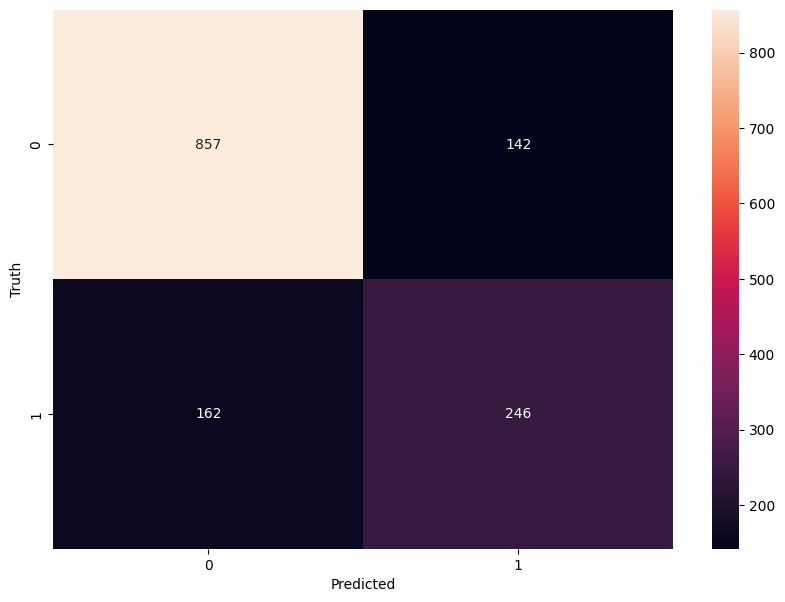

In [ ]:
import seaborn as sns
cm = tf.math.confusion_matrix(labels= y_test, predictions= y_preds)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')